In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [17]:
df['lunch'].unique()


array(['standard', 'free/reduced'], dtype=object)

In [16]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

<AxesSubplot:xlabel='lunch', ylabel='math score'>

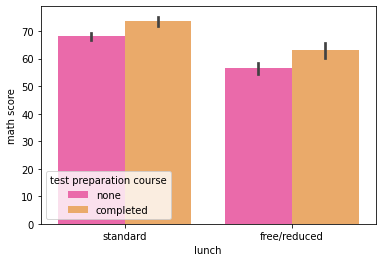

In [25]:
sb.barplot(x='lunch',y='math score',data=df,hue='test preparation course',\
           palette='spring')

In [26]:
df['gender_num'] = df['gender'].apply(lambda x: 0 if x == 'male' else 1)

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,0


In [28]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,1,218
1,female,group C,some college,standard,completed,69,90,88,1,247
2,female,group B,master's degree,standard,none,90,95,93,1,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,148
4,male,group C,some college,standard,none,76,78,75,0,229


In [30]:
df['Percentage'] = df['Total_Marks'].apply(lambda x: x/3)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,1,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,1,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,1,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,148,49.333333
4,male,group C,some college,standard,none,76,78,75,0,229,76.333333


In [32]:
df['parental level of education'].unique()
def education_to_num(education_level):
    education_level_array_ascending = ['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"]
    return education_level_array_ascending.index(education_level)


df['education_level_num'] = df['parental level of education'].apply(lambda x: education_to_num(x))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num,Total_Marks,Percentage,education_level_num
0,female,group B,bachelor's degree,standard,none,72,72,74,1,218,72.666667,4
1,female,group C,some college,standard,completed,69,90,88,1,247,82.333333,2
2,female,group B,master's degree,standard,none,90,95,93,1,278,92.666667,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,148,49.333333,3
4,male,group C,some college,standard,none,76,78,75,0,229,76.333333,2


In [58]:
df_scattered = pd.DataFrame({'Total_Marks':df['Total_Marks'],
                             'Education_level_num':df['education_level_num'],
                             'Education_level':df['parental level of education'],
                             'Mean_mark':df['Percentage']
                            })
df_scattered.describe()

,Total_Marks,Education_level_num,Mean_mark
count,1000.000000,1000.000000,1000.000000
mean,203.312000,2.081000,67.770667
std,42.771978,1.460333,14.257326
min,27.000000,0.000000,9.000000
25%,175.000000,1.000000,58.333333
50%,205.000000,2.000000,68.333333
75%,233.000000,3.000000,77.666667
max,300.000000,5.000000,100.000000


<AxesSubplot:xlabel='Education_level_num', ylabel='Total_Marks'>

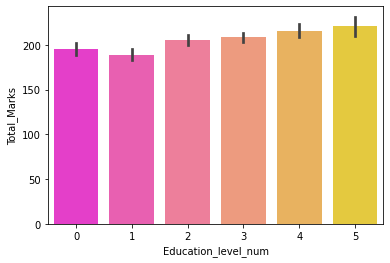

In [59]:
import seaborn as sns
sns.barplot(x='Education_level_num',y='Total_Marks', data=df_scattered,\
           palette='spring')

In [55]:
# 80 = A 70-80 = B 60-70 = C 50-60 = D 40-50 = E меньше 40 = F (Fail)
def mark_to_grade(mark):
    grade = 'A'
    if mark<80 and mark>=70:
        return 'B'
    if mark<70 and mark>=60:
        return 'C'
    if mark<60 and mark>=50:
        return 'D'
    if mark<50 and mark>=40:
        return 'E'
    if mark<40:
        return 'F'
    else:
        return grade


In [60]:
df_scattered['Grade'] = df_scattered['Mean_mark'].apply(lambda x: mark_to_grade(x))
df_scattered.head()

,Total_Marks,Education_level_num,Education_level,Mean_mark,Grade
0,218,4,bachelor's degree,72.666667,B
1,247,2,some college,82.333333,A
2,278,5,master's degree,92.666667,A
3,148,3,associate's degree,49.333333,E
4,229,2,some college,76.333333,B


In [61]:
df_scattered['Grade'].value_counts()

B    261
C    256
A    198
D    182
E     73
F     30
Name: Grade, dtype: int64

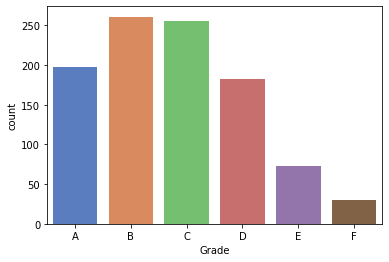

In [63]:
import matplotlib.pyplot as plt
sns.countplot(x="Grade", data = df_scattered, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()



<AxesSubplot:xlabel='Education_level_num', ylabel='count'>

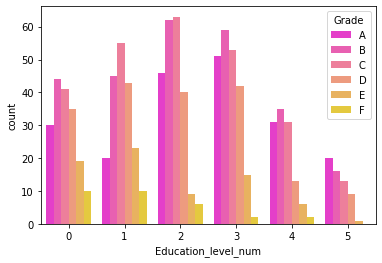

In [87]:
sns.countplot(x='Education_level_num',hue="Grade", hue_order=['A','B','C','D','E','F'], data=df_scattered,\
           palette='spring')

In [90]:
df_scattered['Education_level'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Education_level, dtype: int64

In [91]:
df['Grade'] = df['Percentage'].apply(lambda x: mark_to_grade(x))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num,Total_Marks,Percentage,education_level_num,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,1,218,72.666667,4,B
1,female,group C,some college,standard,completed,69,90,88,1,247,82.333333,2,A
2,female,group B,master's degree,standard,none,90,95,93,1,278,92.666667,5,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,148,49.333333,3,E
4,male,group C,some college,standard,none,76,78,75,0,229,76.333333,2,B


<AxesSubplot:title={'center':'BESTIES'}, xlabel='lunch', ylabel='Total_Marks'>

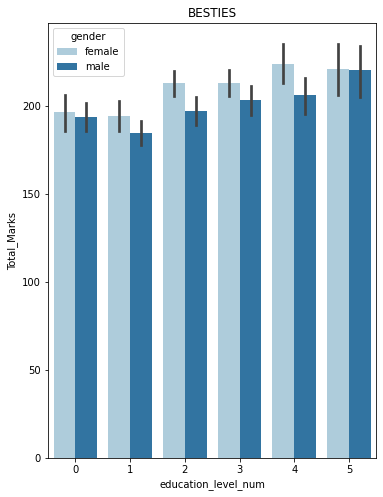

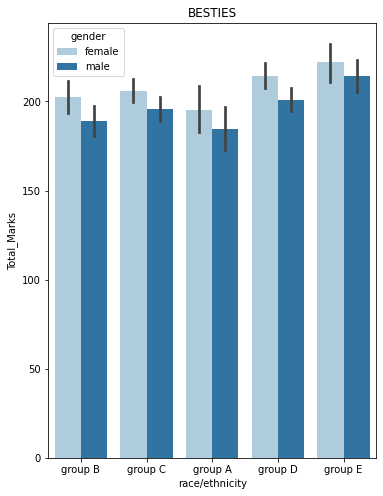

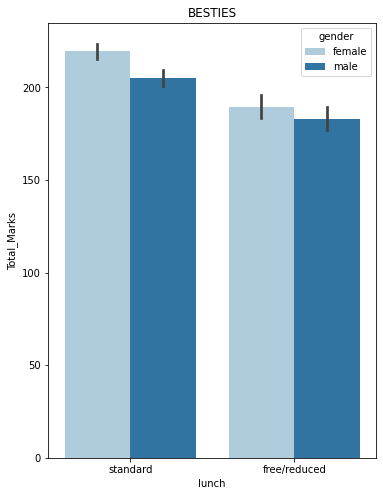

In [102]:
df_best = df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total_Marks'],ascending=False)
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('BESTIES')
sns.barplot(x='education_level_num',y='Total_Marks',data=df,hue='gender',palette='Paired')

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 2)
plt.title('BESTIES')
sns.barplot(x='race/ethnicity',y='Total_Marks',data=df,hue='gender',palette='Paired')

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 3)
plt.title('BESTIES')
sns.barplot(x='lunch',y='Total_Marks',data=df,hue='gender',palette='Paired')

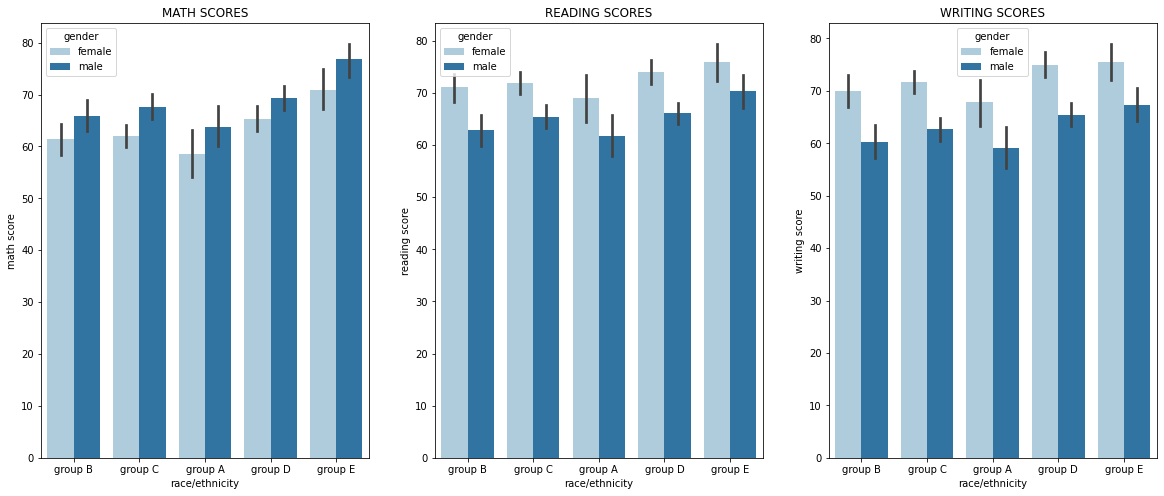

In [93]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

In [ ]:
В среднем женщины имеют лучший средний балл; преимущество возникает благодаря лучшим показателям по чтению и письму.
Лучшие результаты показывают представители этнической группы Е.
В выборке лучших студентов по базовым критериям сохраняется среднее преимущество женщин.
Аномалия наблюдается только в группе людей, имеющих магистерскую степень.
